In [482]:
%load_ext autoreload
%autoreload 2

import os
import sys
import re
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.display import display, HTML, clear_output, Image
import pandas as pd
from itertools import product
import math

# Styling notebook
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML("<style>" + styles + "</style")

css_styling()
display(HTML("<style>.container { width:100% !important; }</style>"))
sys.path.insert(1, "/workspaces/ou-af/problem1/iteratie1")

# import de code
import src.system as system
import src.diagrambuilder as builder
import specs.components as componentspecs
import specs.connections as connectionspecs
import specs.assemblies as assemblyspecs
import specs.tests as testspecs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [448]:
def visualizeStructure(diagram):
#    display(HTML("<style>.container { width:100% !important; }</style>"))

    # print summary of nodes
    print(diagram)

    # view structure
    gnb.showInfluenceDiagram(diagram, size=60)
    
def createUtilityRow(nodelist):
    row_elements = [diagram.utility(node) for node in nodelist]
    gnb.flow.row(*row_elements)

def createCptRow(nodelist):
    row_elements = [diagram.cpt(node) for node in nodelist]
    gnb.flow.row(*row_elements)

def showCPTs(diagram):
    nodes = diagram.nodes()
    for n in nodes:
        if(diagram.isChanceNode(n)):
            gnb.flow.row(diagram.cpt(n))
            
def getDiagramChanceNodeIdsForComponent(componentname, diagram):
    idlist = []
    diagramNames = diagram.names()
    for dname in diagramNames:
        if(re.search(componentname + "$", dname)):
            nodeid = diagram.idFromName(dname)
            if (diagram.isChanceNode(nodeid)):
                idlist.append(nodeid)
    return idlist
    

def printCptTables(diagram, system):
    for component in system.getComponents():
        print("CPT tables for component: " + component.getName())
        createCptRow(getDiagramChanceNodeIdsForComponent(component.getName(), diagram))
        
def getDiagramUtilityNodeIdsForComponent(componentname, diagram):
    idlist = []
    diagramNames = diagram.names()
    for dname in diagramNames:
        if(re.search(componentname + "$", dname)):
            nodeid = diagram.idFromName(dname)
            if (diagram.isUtilityNode(nodeid)):
                idlist.append(nodeid)
    return idlist
    

def printUtilityTables(diagram, system):
    for component in system.getComponents():
        print("Utility tables for component: " + component.getName())
        createUtilityRow(getDiagramUtilityNodeIdsForComponent(component.getName(), diagram))

building system: structure1
number of components: 2
number of connections: 1
number of tests: 2
adding component: Light
adding component: Switch
adding connection between: PresentPowerOutputsSwitch and: PresentPowerInputsLight
adding cpt for component: Light
adding cpt for component: Switch
adding cpt for connection: Wire
adding Replace decision for component: Light
adding Replace decision for component: Switch
adding Replace utility for component: Light
adding Replace utility for component: Switch
adding test: TestObserveHealth to component: Light
adding test: TestObserveHealth to component: Switch


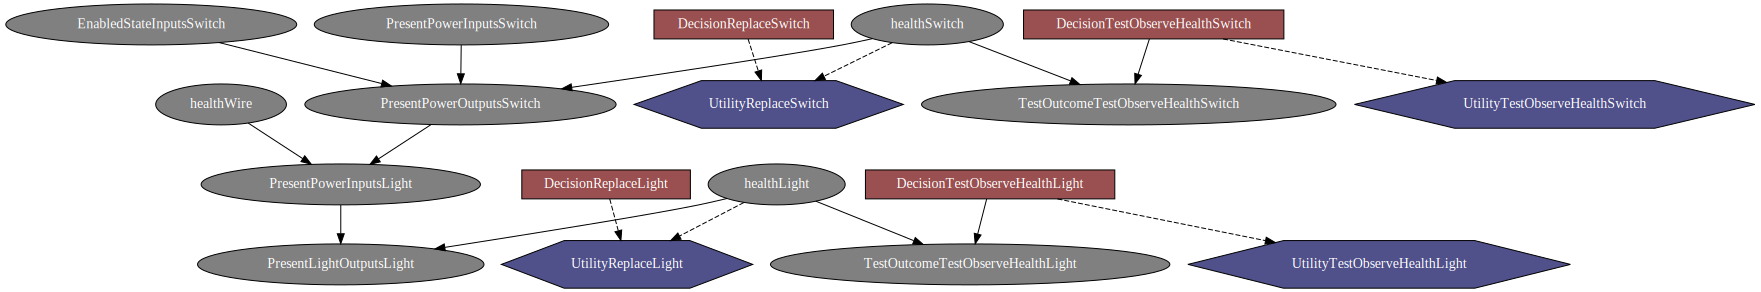

In [449]:
# gather specs for a system
# system = light + replacedecision + test
components = [componentspecs.light, componentspecs.switch]
connections = [connectionspecs.wire, connectionspecs.wire2]
tests = [testspecs.testObserveHealth]
assembly = {
    "components"  : components,
    "connections" : connections,
    "structure"   : assemblyspecs.structure1,
    "tests"       : tests,
    "testmapping" : testspecs.testmapping2
}

# read specifications, create system of objects
system = system.createSystemFromSpecs(assembly)

# create diagram object
diagram = gum.InfluenceDiagram()

diagram = builder.diagramBuilder(diagram, system)

# view structure
gnb.showInfluenceDiagram(diagram, size=100)

In [450]:
diagram.addArc('TestOutcomeTestObserveHealthSwitch', "DecisionReplaceSwitch")
diagram.addArc('TestOutcomeTestObserveHealthLight', "DecisionReplaceLight")

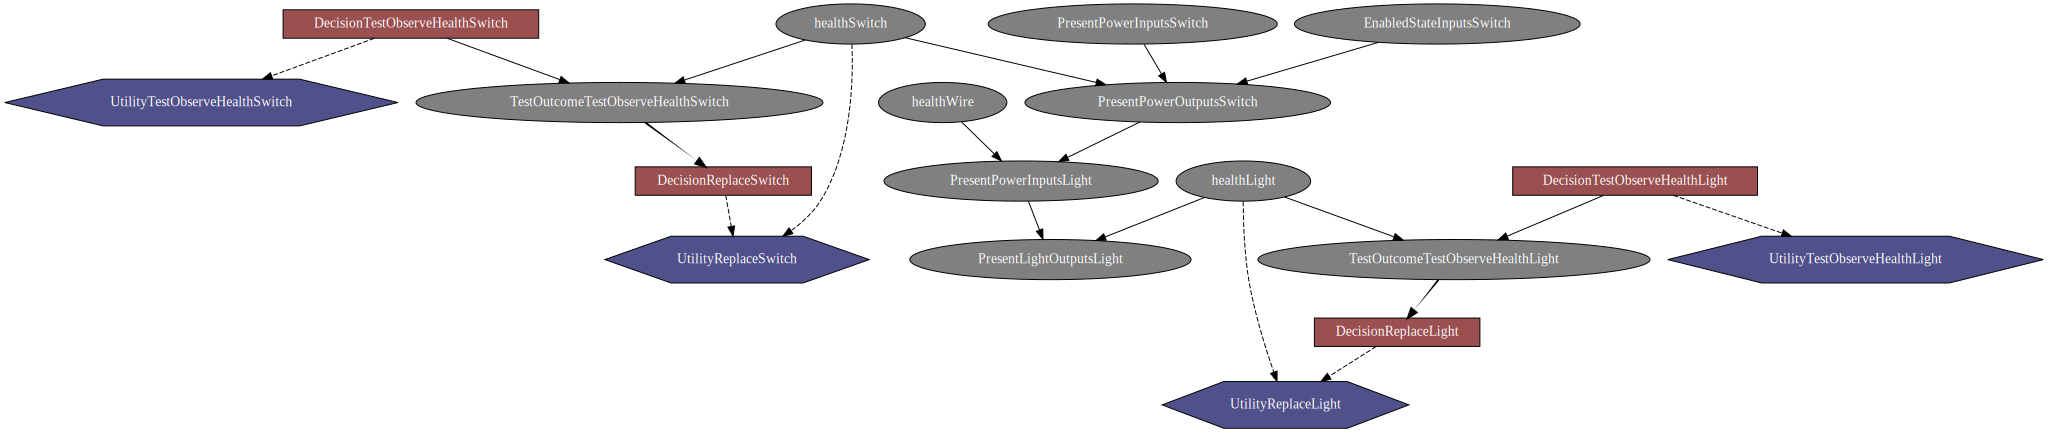

In [451]:
gnb.showInfluenceDiagram(diagram, size=100)

In [452]:
gnb.flow.row(
diagram.utility("UtilityTestObserveHealthSwitch"),
diagram.utility("UtilityTestObserveHealthLight"),
diagram.utility("UtilityReplaceSwitch"),
diagram.utility("UtilityReplaceLight")
) 
    

In [453]:
gnb.flow.row(diagram.cpt("healthSwitch"),
             diagram.cpt("healthLight"),
             diagram.cpt("healthWire")
            )

In [454]:
diagram.cpt("TestOutcomeTestObserveHealthLight")[0] = [[0.998, 0.001, 0.001], [0.001, 0.001, 0.998]]
diagram.cpt("TestOutcomeTestObserveHealthLight")[1] = [[0.001, 0.998, 0.001], [0.001, 0.001, 0.998]]

diagram.cpt("TestOutcomeTestObserveHealthSwitch")[0] = [[0.998, 0.001, 0.001], [0.001, 0.001, 0.998]]
diagram.cpt("TestOutcomeTestObserveHealthSwitch")[1] = [[0.001, 0.998, 0.001], [0.001, 0.001, 0.998]]

In [455]:
gnb.flow.row(diagram.cpt("TestOutcomeTestObserveHealthLight"),
            diagram.cpt("TestOutcomeTestObserveHealthSwitch"))

In [456]:
gnb.flow.row(diagram.cpt("PresentLightOutputsLight"),
            diagram.cpt("PresentPowerInputsLight"),
            diagram.cpt("PresentPowerOutputsSwitch")
            )

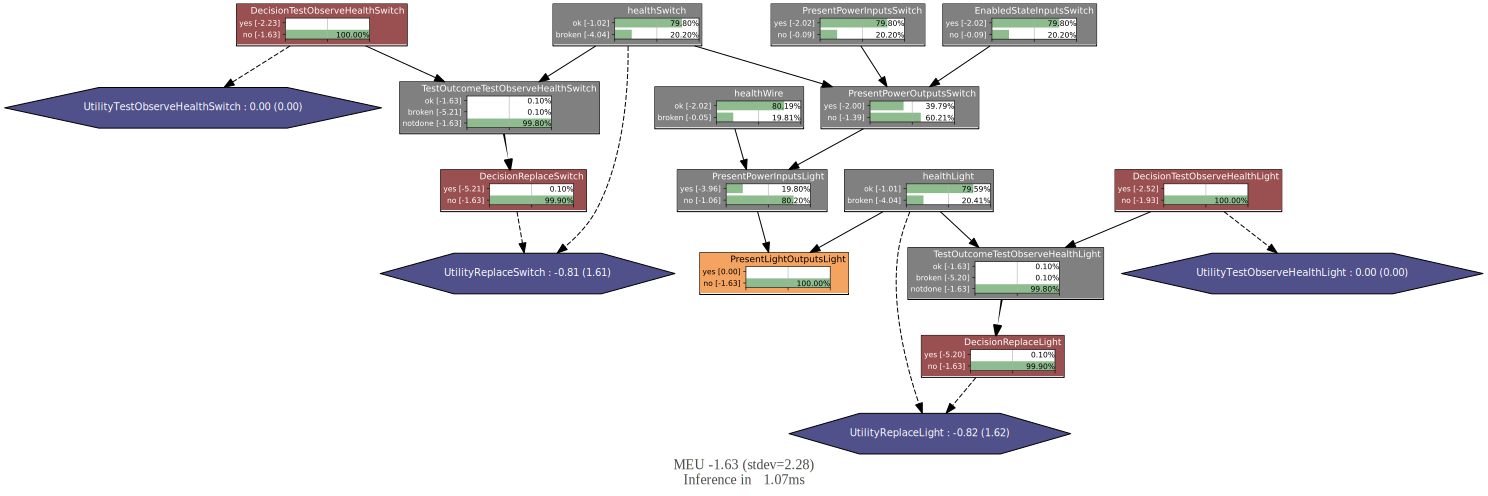

In [457]:
evs = {
'PresentLightOutputsLight':1,

#'PresentPowerInputsLight':1,
    
#'PresentPowerOutputsSwitch':0,
#'PresentPowerInputsSwitch':0,
#'EnabledStateInputsSwitch':0,

# 'DecisionReplaceLight':,
# 'DecisionReplaceSwitch':,
# 'DecisionTestObserveHealthLight':,
# 'DecisionTestObserveHealthSwitch':,

# 'TestOutcomeTestObserveHealthLight':,
# 'TestOutcomeTestObserveHealthSwitch':,
# 'UtilityReplaceLight':,
# 'UtilityReplaceSwitch':,
# 'UtilityTestObserveHealthLight':,
# 'UtilityTestObserveHealthSwitch':,
# 'healthLight':,
# 'healthSwitch':,
# 'healthWire':
}
gnb.showInference(diagram, evs=evs, size=40)


In [458]:
diagram.cpt("healthWire")[0] = 0.95
diagram.cpt("healthWire")[1] = 0.05

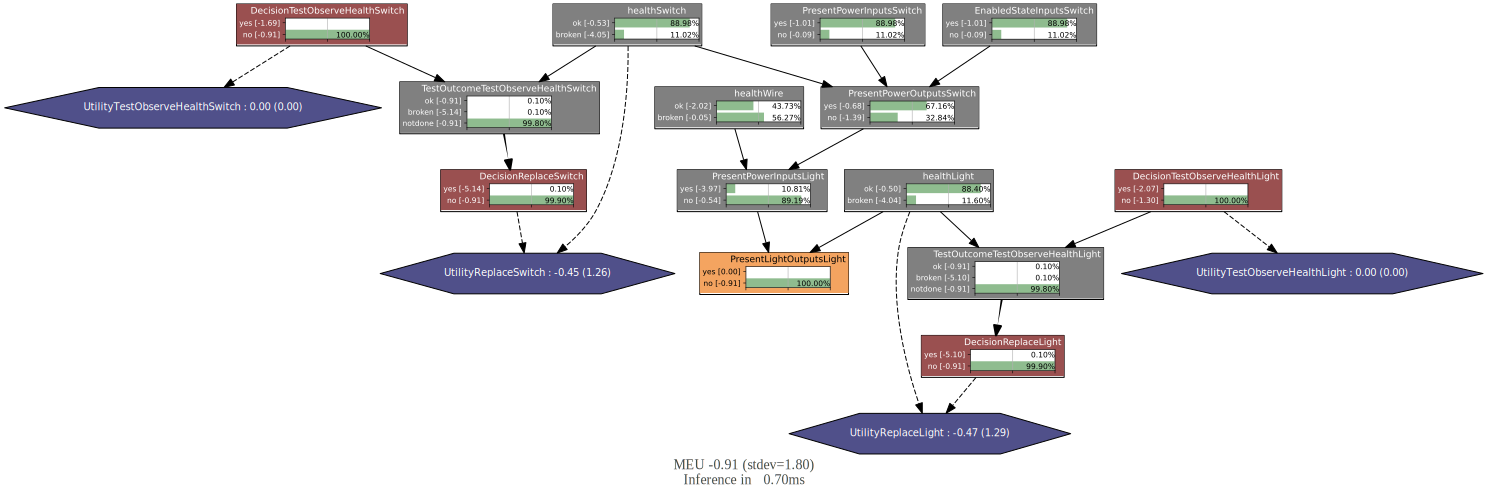

In [459]:
evs = {
'PresentLightOutputsLight':1,

#'PresentPowerInputsLight':1,
    
#'PresentPowerOutputsSwitch':0,
#'PresentPowerInputsSwitch':0,
#'EnabledStateInputsSwitch':0,

# 'DecisionReplaceLight':,
# 'DecisionReplaceSwitch':,
# 'DecisionTestObserveHealthLight':,
# 'DecisionTestObserveHealthSwitch':,

# 'TestOutcomeTestObserveHealthLight':,
# 'TestOutcomeTestObserveHealthSwitch':,
# 'UtilityReplaceLight':,
# 'UtilityReplaceSwitch':,
# 'UtilityTestObserveHealthLight':,
# 'UtilityTestObserveHealthSwitch':,
# 'healthLight':,
# 'healthSwitch':,
# 'healthWire':
}
gnb.showInference(diagram, evs=evs, size=40)

In [460]:
diagram.cpt("healthSwitch")[0] = 0.95
diagram.cpt("healthSwitch")[1] = 0.05
diagram.cpt("healthWire")[0] = 0.99
diagram.cpt("healthWire")[1] = 0.01


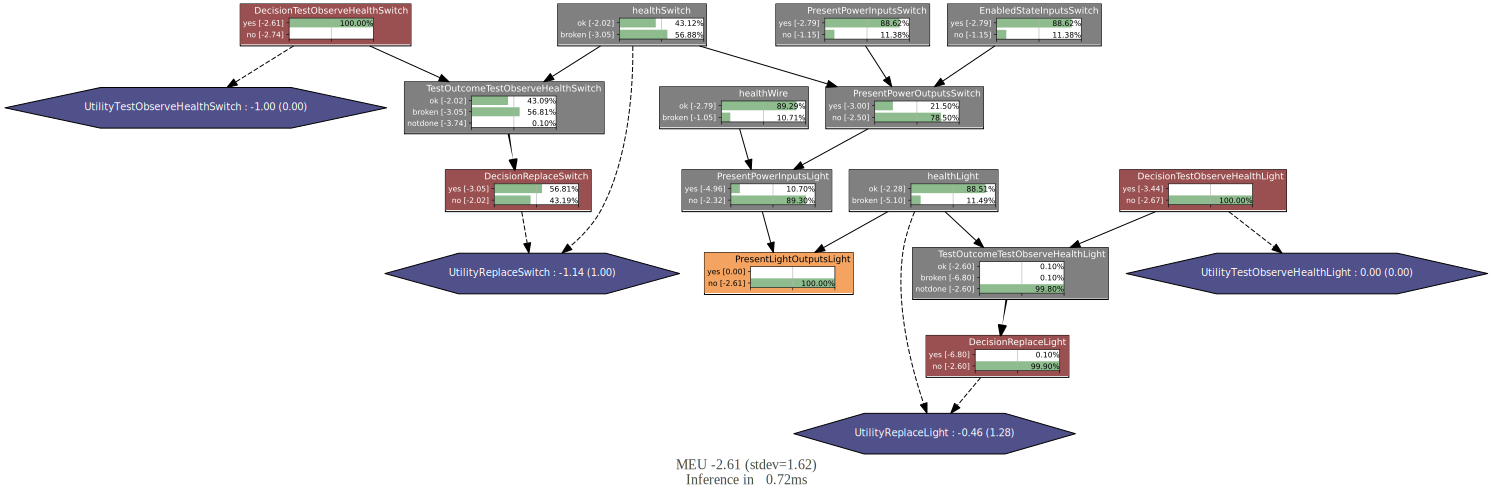

In [461]:
evs = {
'PresentLightOutputsLight':1,

#'PresentPowerInputsLight':1,
    
#'PresentPowerOutputsSwitch':0,
#'PresentPowerInputsSwitch':0,
#'EnabledStateInputsSwitch':0,

# 'DecisionReplaceLight':,
# 'DecisionReplaceSwitch':,
# 'DecisionTestObserveHealthLight':,
# 'DecisionTestObserveHealthSwitch':,

# 'TestOutcomeTestObserveHealthLight':,
# 'TestOutcomeTestObserveHealthSwitch':,
# 'UtilityReplaceLight':,
# 'UtilityReplaceSwitch':,
# 'UtilityTestObserveHealthLight':,
# 'UtilityTestObserveHealthSwitch':,
# 'healthLight':,
# 'healthSwitch':,
# 'healthWire':
}
gnb.showInference(diagram, evs=evs, size=40)

In [462]:
diagram.cpt("healthSwitch")[0] = 0.90
diagram.cpt("healthSwitch")[1] = 0.1
diagram.cpt("healthWire")[0] = 0.95
diagram.cpt("healthWire")[1] = 0.05

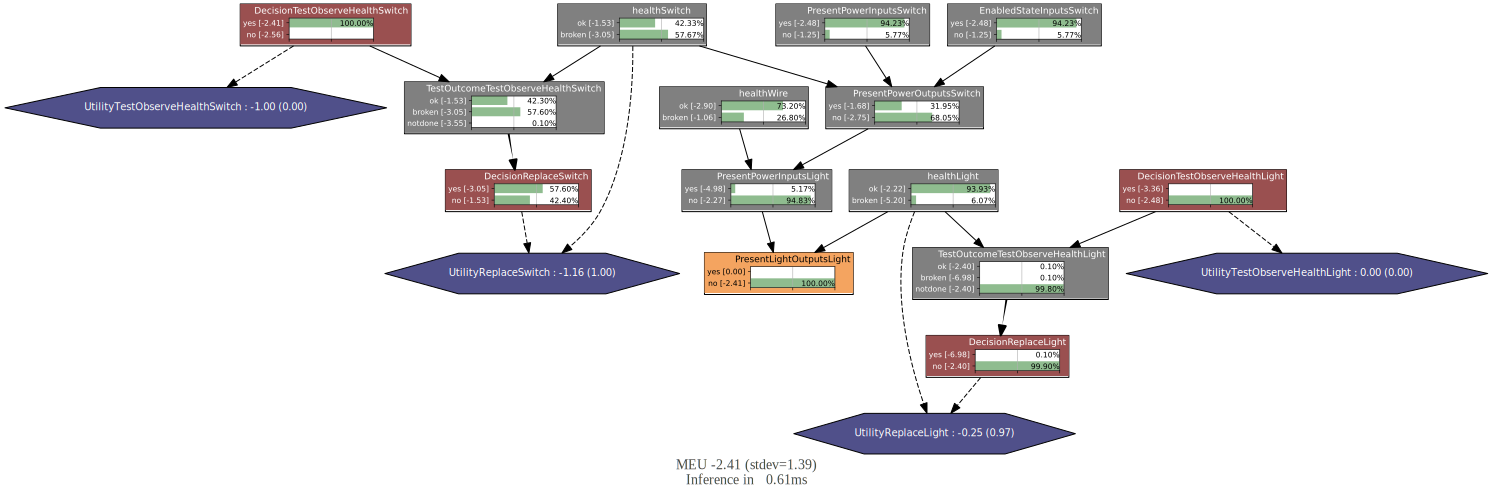

In [463]:
evs = {
'PresentLightOutputsLight':1,

#'PresentPowerInputsLight':1,
    
#'PresentPowerOutputsSwitch':0,
#'PresentPowerInputsSwitch':0,
#'EnabledStateInputsSwitch':0,

# 'DecisionReplaceLight':,
# 'DecisionReplaceSwitch':,
# 'DecisionTestObserveHealthLight':,
# 'DecisionTestObserveHealthSwitch':,

# 'TestOutcomeTestObserveHealthLight':,
# 'TestOutcomeTestObserveHealthSwitch':,
# 'UtilityReplaceLight':,
# 'UtilityReplaceSwitch':,
# 'UtilityTestObserveHealthLight':,
# 'UtilityTestObserveHealthSwitch':,
# 'healthLight':,
# 'healthSwitch':,
# 'healthWire':
}
gnb.showInference(diagram, evs=evs, size=40)

In [464]:
diagram.cpt("healthLight")[0] = 0.9
diagram.cpt("healthLight")[1] = 0.1
diagram.cpt("healthSwitch")[0] = 0.95
diagram.cpt("healthSwitch")[1] = 0.05
diagram.cpt("healthWire")[0] = 0.99
diagram.cpt("healthWire")[1] = 0.01

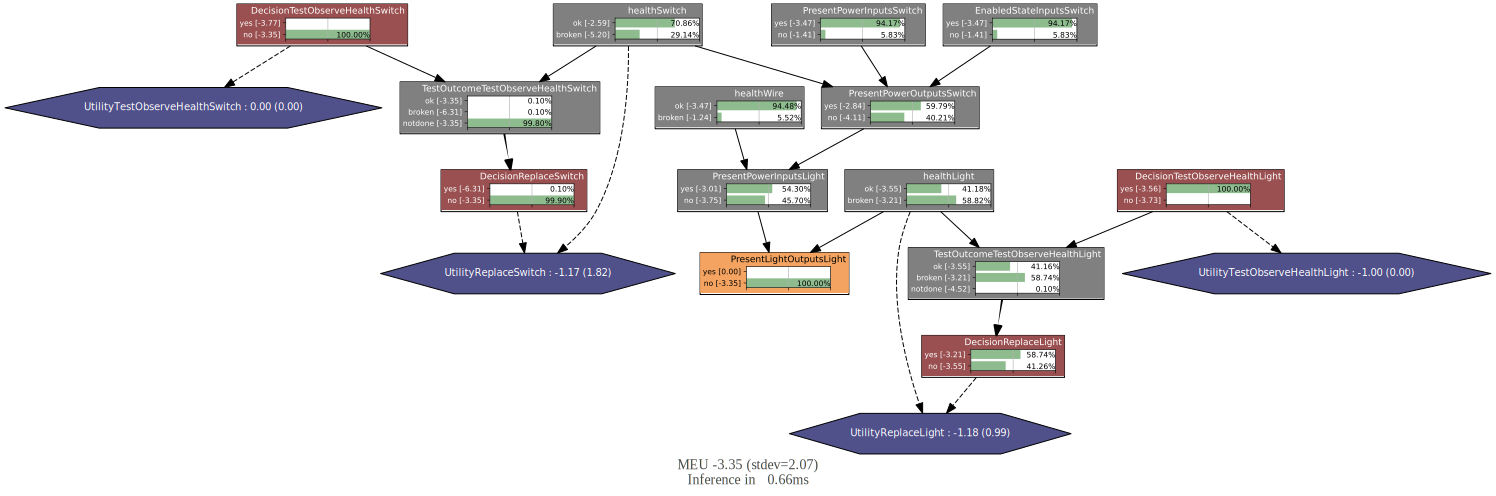

In [465]:
evs = {
'PresentLightOutputsLight':1,

#'PresentPowerInputsLight':1,
    
#'PresentPowerOutputsSwitch':0,
#'PresentPowerInputsSwitch':0,
#'EnabledStateInputsSwitch':0,

# 'DecisionReplaceLight':,
# 'DecisionReplaceSwitch':,
# 'DecisionTestObserveHealthLight':,
# 'DecisionTestObserveHealthSwitch':,

# 'TestOutcomeTestObserveHealthLight':,
# 'TestOutcomeTestObserveHealthSwitch':,
# 'UtilityReplaceLight':,
# 'UtilityReplaceSwitch':,
# 'UtilityTestObserveHealthLight':,
# 'UtilityTestObserveHealthSwitch':,
# 'healthLight':,
# 'healthSwitch':,
# 'healthWire':
}
gnb.showInference(diagram, evs=evs, size=40)

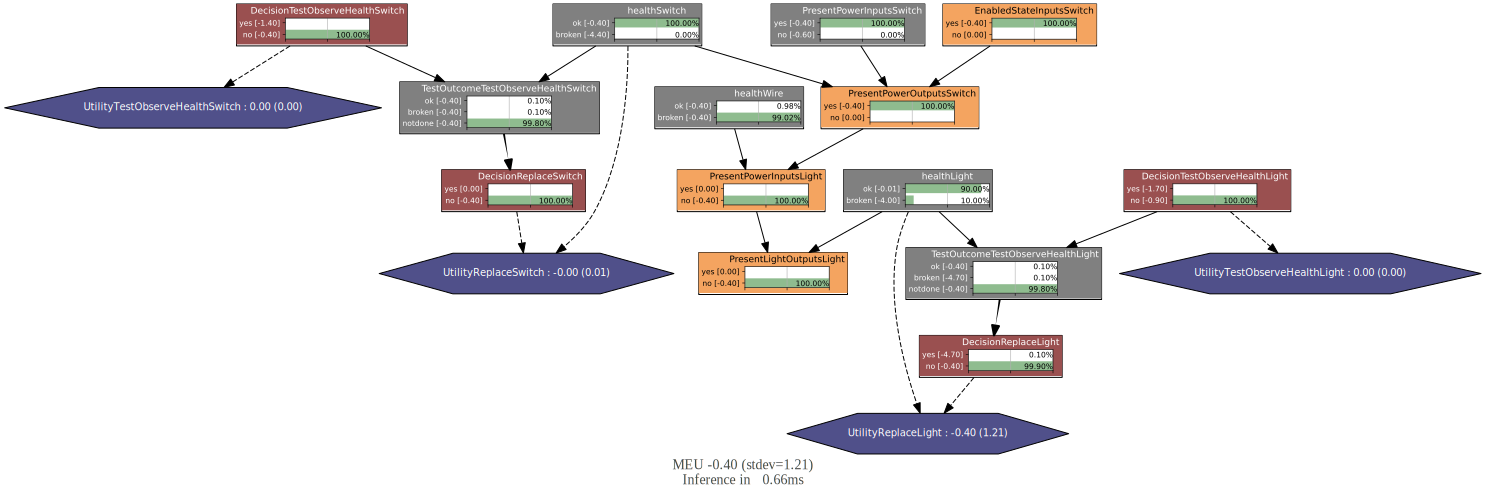

In [466]:
evs = {
'PresentLightOutputsLight':1,

'PresentPowerInputsLight':1,
    
'PresentPowerOutputsSwitch':0,
#'PresentPowerInputsSwitch':1,
'EnabledStateInputsSwitch':0,

# 'DecisionReplaceLight':,
# 'DecisionReplaceSwitch':,
# 'DecisionTestObserveHealthLight':,
# 'DecisionTestObserveHealthSwitch':,

# 'TestOutcomeTestObserveHealthLight':,
# 'TestOutcomeTestObserveHealthSwitch':,
# 'UtilityReplaceLight':,
# 'UtilityReplaceSwitch':,
# 'UtilityTestObserveHealthLight':,
# 'UtilityTestObserveHealthSwitch':,
# 'healthLight':,
# 'healthSwitch':,
# 'healthWire':
}
gnb.showInference(diagram, evs=evs, size=40)

In [467]:
diagram.cpt("healthLight")[0] = 0.99
diagram.cpt("healthLight")[1] = 0.01
diagram.cpt("healthSwitch")[0] = 0.99
diagram.cpt("healthSwitch")[1] = 0.01
diagram.cpt("healthWire")[0] = 0.99
diagram.cpt("healthWire")[1] = 0.01

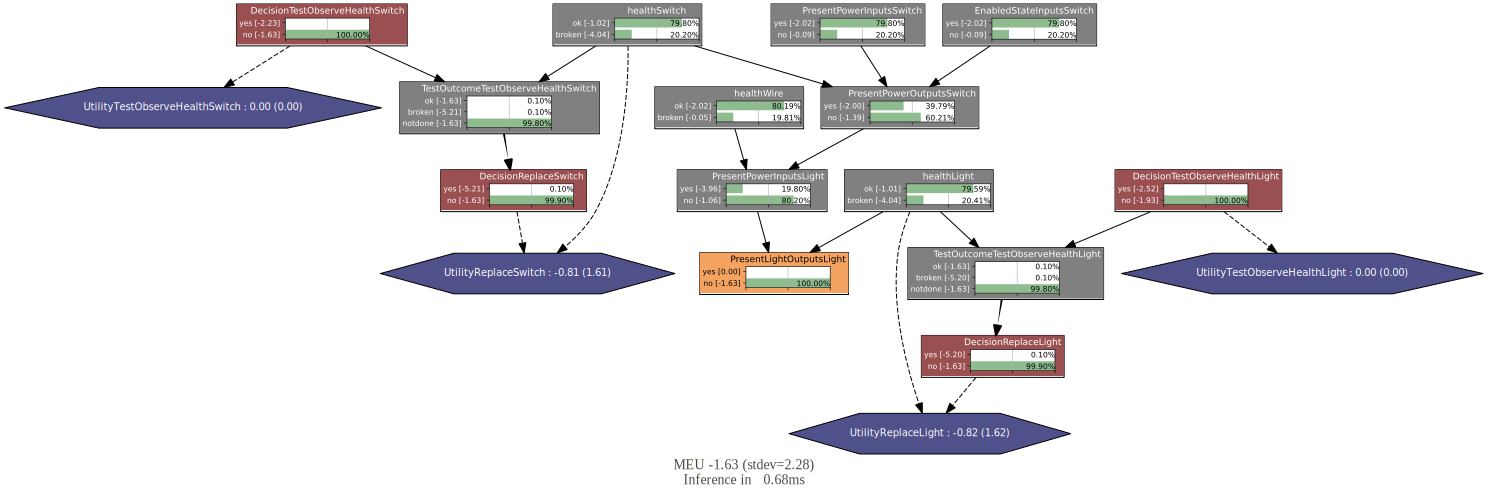

In [468]:
evs = {
'PresentLightOutputsLight':1,

#'PresentPowerInputsLight':1,

#'PresentPowerOutputsSwitch':0,
#'PresentPowerInputsSwitch':1,
#'EnabledStateInputsSwitch':0,

# 'DecisionReplaceLight':,
# 'DecisionReplaceSwitch':,
# 'DecisionTestObserveHealthLight':,
# 'DecisionTestObserveHealthSwitch':,

# 'TestOutcomeTestObserveHealthLight':,
# 'TestOutcomeTestObserveHealthSwitch':,
# 'UtilityReplaceLight':,
# 'UtilityReplaceSwitch':,
# 'UtilityTestObserveHealthLight':,
# 'UtilityTestObserveHealthSwitch':,
# 'healthLight':,
# 'healthSwitch':,
# 'healthWire':
}
gnb.showInference(diagram, evs=evs, size=40)

In [469]:
diagram.getDecisionGraph()

(pyAgrum.DAG@0x3e09ae00) {8,10,12,15} , {12->8,15->10}

In [470]:
diagram.decisionOrderExists()

False

In [471]:
ie = gum.ShaferShenoyLIMIDInference(diagram) 
ie.setEvidence(evs)
ie.addNoForgettingAssumption(["DecisionTestObserveHealthSwitch","DecisionReplaceSwitch", "DecisionTestObserveHealthLight", "DecisionReplaceLight"])
gnb.sideBySide(gnb.getInference(diagram,engine=ie, evs=evs, size=200))

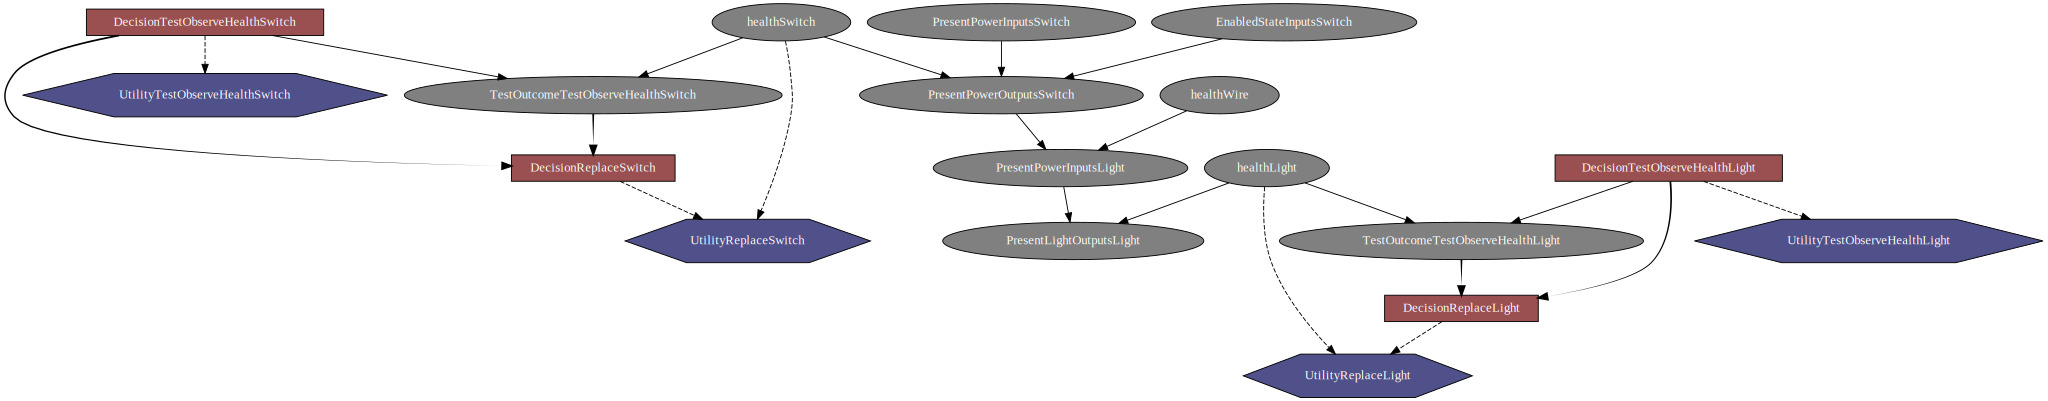

In [472]:
gnb.showInfluenceDiagram(ie.reducedLIMID(), size=100)

In [473]:
ie.reducedLIMID().decisionOrderExists()

False

In [474]:
diagram.addArc("DecisionReplaceSwitch", "DecisionTestObserveHealthLight")

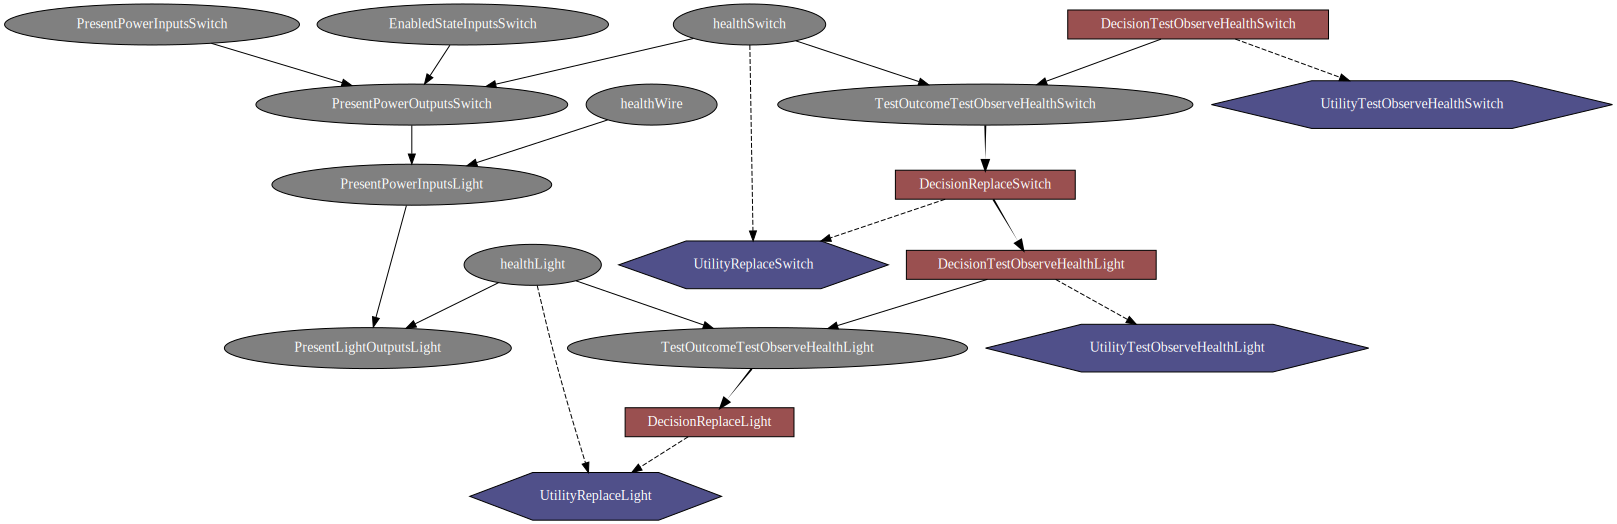

In [475]:
gnb.showInfluenceDiagram(diagram, size=100)

In [476]:
diagram.cpt("healthLight")[0] = 0.9
diagram.cpt("healthLight")[1] = 0.1
diagram.cpt("healthSwitch")[0] = 0.95
diagram.cpt("healthSwitch")[1] = 0.05
diagram.cpt("healthWire")[0] = 0.99
diagram.cpt("healthWire")[1] = 0.01

In [477]:
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,0] = -5  # health:ok, decision:yes
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,1] = 0   # health:ok, decision:no
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,0] = -2 # health:broken, decision:yes  
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,1] = -4  # health:broken, decision:no

In [478]:
diagram.utility(diagram.idFromName("UtilityReplaceLight"))

(pyAgrum.Potential<double>@0x3d1b7ba0) 
             ||  Utility|
Decisi|health||0        |
------|------||---------|
yes   |ok    || -5.0000 |
no    |ok    || 0.0000  |
yes   |broken|| -2.0000 |
no    |broken|| -4.0000 |

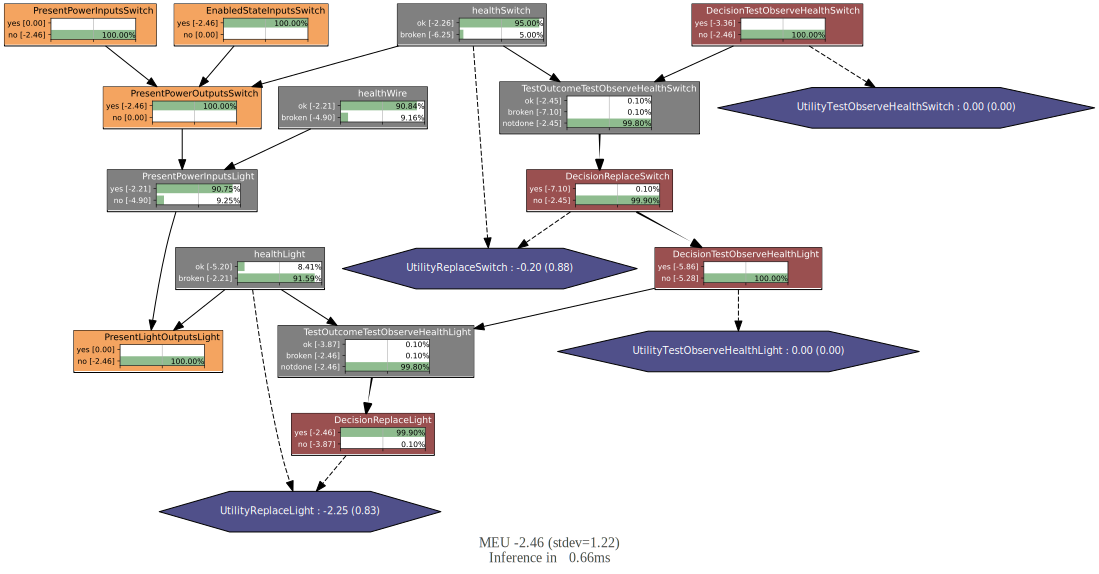

In [479]:
evs = {
'PresentLightOutputsLight':1,

#'PresentPowerInputsLight':1,

'PresentPowerOutputsSwitch':0,
'PresentPowerInputsSwitch':1,
'EnabledStateInputsSwitch':0,

# 'DecisionReplaceLight':,
# 'DecisionReplaceSwitch':,
# 'DecisionTestObserveHealthLight':,
# 'DecisionTestObserveHealthSwitch':,

# 'TestOutcomeTestObserveHealthLight':,
# 'TestOutcomeTestObserveHealthSwitch':,
# 'UtilityReplaceLight':,
# 'UtilityReplaceSwitch':,
# 'UtilityTestObserveHealthLight':,
# 'UtilityTestObserveHealthSwitch':,
# 'healthLight':,
# 'healthSwitch':,
# 'healthWire':
}
gnb.showInference(diagram, evs=evs, size=40)

In [480]:
diagram.getDecisionGraph()

(pyAgrum.DAG@0x3e4fbe10) {8,10,12,15} , {10->12,12->8,15->10}

building system: structure1
number of components: 2
number of connections: 1
number of tests: 0
adding component: Light
adding component: Switch
adding connection between: PresentPowerOutputsSwitch and: PresentPowerInputsLight
adding cpt for component: Light
adding cpt for component: Switch
adding cpt for connection: Wire
adding Replace decision for component: Light
adding Replace decision for component: Switch
adding Replace utility for component: Light
adding Replace utility for component: Switch


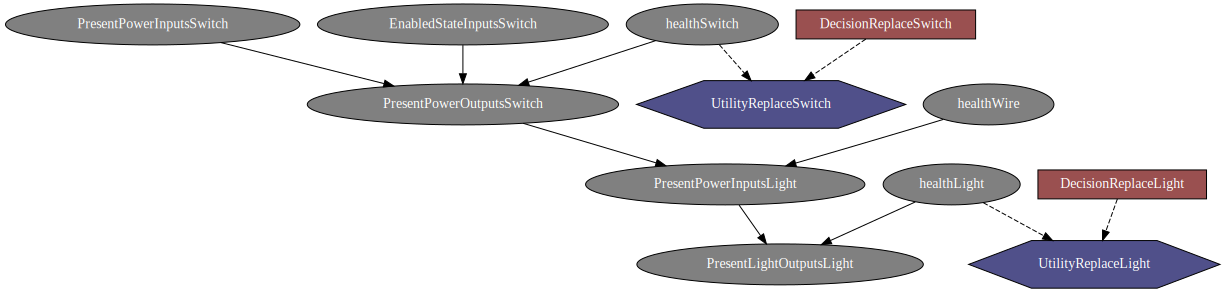

In [483]:
# first run first cell of this notebook
# gather specs for a system
# system = light + replacedecision + test
components = [componentspecs.light, componentspecs.switch]
connections = [connectionspecs.wire, connectionspecs.wire2]
tests = [testspecs.testObserveHealth]
assembly = {
    "components"  : components,
    "connections" : connections,
    "structure"   : assemblyspecs.structure1,
    "tests"       : tests,
    "testmapping" : testspecs.testmapping4
}

# read specifications, create system of objects
system = system.createSystemFromSpecs(assembly)

# create diagram object
diagram = gum.InfluenceDiagram()

diagram = builder.diagramBuilder(diagram, system)

# view structure
gnb.showInfluenceDiagram(diagram, size=100)

In [487]:
gnb.flow.row(
#diagram.utility("UtilityTestObserveHealthSwitch"),
#diagram.utility("UtilityTestObserveHealthLight"),
diagram.utility("UtilityReplaceSwitch"),
diagram.utility("UtilityReplaceLight")
) 

gnb.flow.row(diagram.cpt("healthSwitch"),
             diagram.cpt("healthLight"),
             diagram.cpt("healthWire")
            )

#diagram.cpt("TestOutcomeTestObserveHealthLight")[0] = [[0.998, 0.001, 0.001], [0.001, 0.001, 0.998]]
#diagram.cpt("TestOutcomeTestObserveHealthLight")[1] = [[0.001, 0.998, 0.001], [0.001, 0.001, 0.998]]

#diagram.cpt("TestOutcomeTestObserveHealthSwitch")[0] = [[0.998, 0.001, 0.001], [0.001, 0.001, 0.998]]
#diagram.cpt("TestOutcomeTestObserveHealthSwitch")[1] = [[0.001, 0.998, 0.001], [0.001, 0.001, 0.998]]

#gnb.flow.row(diagram.cpt("TestOutcomeTestObserveHealthLight"),
#            diagram.cpt("TestOutcomeTestObserveHealthSwitch"))

gnb.flow.row(diagram.cpt("PresentLightOutputsLight"),
            diagram.cpt("PresentPowerInputsLight"),
            diagram.cpt("PresentPowerOutputsSwitch")
            )

In [490]:
diagram.cpt("healthLight")[0] = 0.9
diagram.cpt("healthLight")[1] = 0.1
diagram.cpt("healthSwitch")[0] = 0.95
diagram.cpt("healthSwitch")[1] = 0.05
diagram.cpt("healthWire")[0] = 0.99
diagram.cpt("healthWire")[1] = 0.01

In [511]:
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,0] = -50  # health:ok, decision:yes
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[0,1] = 0   # health:ok, decision:no
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,0] = -20 # health:broken, decision:yes  
diagram.utility(diagram.idFromName("UtilityReplaceLight"))[1,1] = -40  # health:broken, decision:no

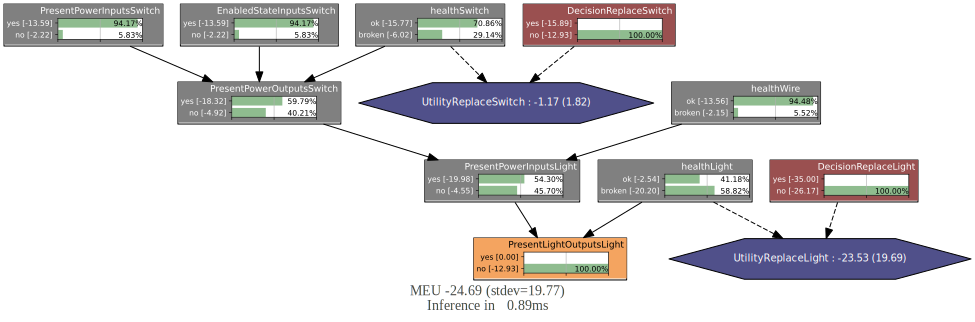

In [512]:
evs = {
'PresentLightOutputsLight':1,

#'PresentPowerInputsLight':0,

#'PresentPowerOutputsSwitch':1,
#'PresentPowerInputsSwitch':0,
#'EnabledStateInputsSwitch':0,

# 'DecisionReplaceLight':,
# 'DecisionReplaceSwitch':,
# 'DecisionTestObserveHealthLight':,
# 'DecisionTestObserveHealthSwitch':,

# 'TestOutcomeTestObserveHealthLight':,
# 'TestOutcomeTestObserveHealthSwitch':,
# 'UtilityReplaceLight':,
# 'UtilityReplaceSwitch':,
# 'UtilityTestObserveHealthLight':,
# 'UtilityTestObserveHealthSwitch':,
# 'healthLight':,
# 'healthSwitch':,
# 'healthWire':
}
gnb.showInference(diagram, evs=evs, size=40)